# DO UPVOTE AND FOLLOW

# DATASET
# This dataset contains product listings as well as products ratings and sales performance, which you would not find in other datasets.

# With this, you can finally start to look for correlations and patterns regarding the success of a product and the various components.

# Features and Columns
* The data was scraped in the french localisation (hence some non-ascii latin characters such as « é » and « à ») in the title column. 
* The title_orig on the other hand contains the original title (the base title) that is displayed by default. When a translation is provided by the seller, it appears in the title column. When the title and title_orig columns are the same, it generally means that the seller did not specify a translation that would be displayed to users with french settings.
* A picture is worth a thousand words. In the following screenshot you see some features and how to interpret them.

# ***THINGS YOU HAVE TO FOLLOW WHILE WALKING THROUGH THE WHOLE REPORT***

1. If you are familiar with python then only follow the code. 
2. The simple explanations about any visual or graph will be there.
3. There will be a brief conclusion of the report.
4. Every explanation is presented below the line of code's output.

***Enjoy***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud

In [2]:
df= pd.read_csv("../input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# WHAT WE CAN EXPECT

1. * How different is the 'price' from 'retail price' and what is the effect of the difference. Expecting higher number of units sold if price is less than retail price and vice versa.
1. * Does having ad boosts increase success?
1. * Any correlation between units sold and ratings?
1. * What is badges? This looks like 'awards' of some sort? Do success with increase in number of badges?
1. * What are effect of different type of badges?
1. * Maybe some brief analysis on product variations.. Do increased variations leads to inreased success?
1. * Shipping options analysis
1. * Analysis of inventory total and units sold.

In [6]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [7]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');

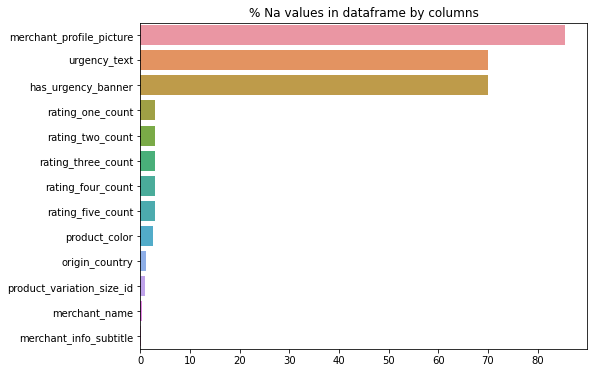

In [8]:
plot_missing_data(df)

In [9]:
df['has_urgency_banner'] = df['has_urgency_banner'].replace(np.nan,0)
df['urgency_text']=df['urgency_text'].replace({'Quantité limitée !':'QuantityLimited',
                                               'Réduction sur les achats en gros':'WholesaleDiscount',
                                               np.nan:'noText'})


In [10]:
rating_columns = ['rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count']
df[rating_columns] = df[rating_columns].fillna(value=-1)

In [11]:
df.loc[df['rating_five_count']==-1,'rating_count'].value_counts()
# all values in the rating_count column are 0 where there are na values in other rating count columns so lets fill 0 in place of the na values

0    45
Name: rating_count, dtype: int64

In [12]:
df[rating_columns]=df[rating_columns].replace(-1,0)

In [13]:
nan_cat_cols = ['origin_country','product_color','product_variation_size_id','merchant_name','merchant_info_subtitle']
df[nan_cat_cols] = df[nan_cat_cols].replace(np.nan,'Unknown')

In [14]:
df.columns[df.isna().sum()>0]

Index(['merchant_profile_picture'], dtype='object')

In [15]:
df= df.drop_duplicates()

In [16]:
print("Duplicate product_id :",df['product_id'].duplicated().sum())

Duplicate product_id : 198


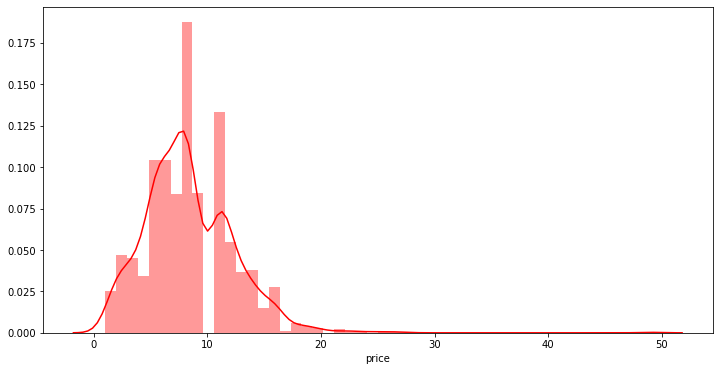

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'], color='red', label='Price')

# right skewed distribution

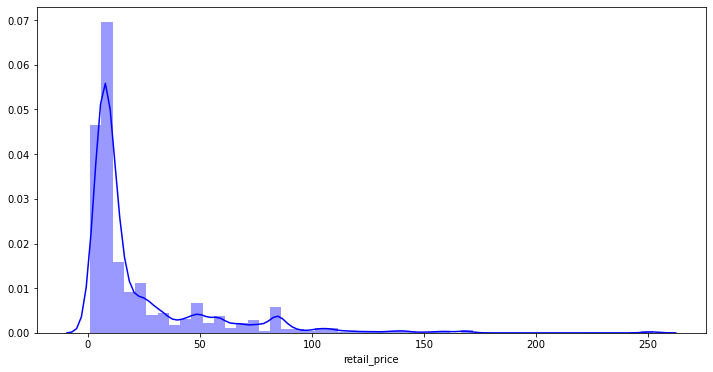

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df['retail_price'], color='blue', label='Retail price')


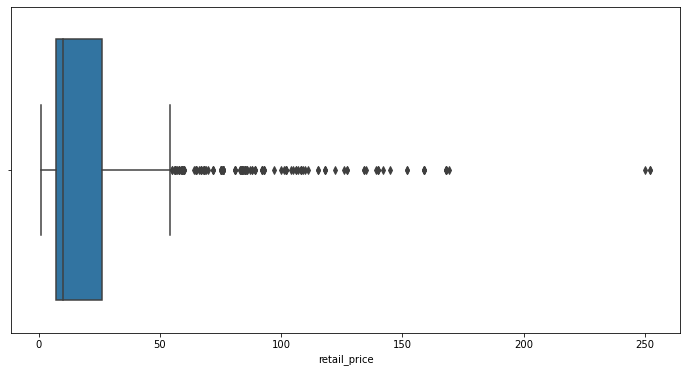

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(df["retail_price"])

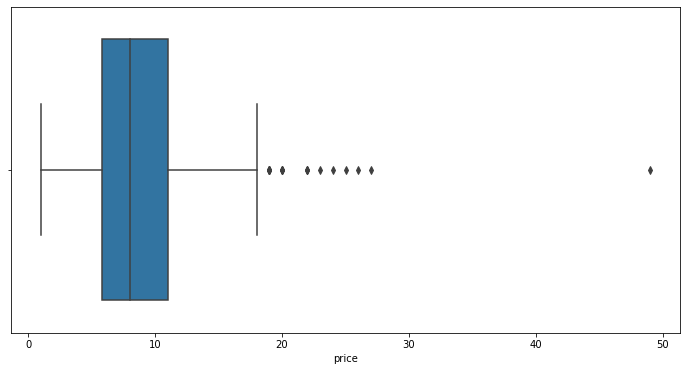

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(df["price"])

# With Boxplots we can easily spot the outliers and quartiles

* The Upper fence of Price is at 18 i.e most of the data is priced less tha 18
* There an item wiht price of 49 i.e clearly an oulier as it is far away from the Inter Quartile Range (Q3 - Q1)
* Box plot of Retail price is much more spread out, there is huge difference of 195 between the upper fence and max data point

In [21]:
country_price=df[['units_sold','origin_country']]
country_mean_price=country_price.groupby('origin_country')['units_sold'].mean().reset_index()
country_mean_price.rename(columns={'units_sold': 'units_sold_mean'},inplace=True)
to_codes={'CN':'CHN',
         'GB':'GBR',
         'SG':'SGP',
         'US':'USA',
         'VE':'VEN'}
country_mean_price['code']=country_mean_price['origin_country'].map(to_codes)
country_mean_price

,origin_country,units_sold_mean,code
0,AT,100.000000,NaN
1,CN,4469.229784,CHN
2,GB,1000.000000,GBR
3,SG,10050.000000,SGP
4,US,1405.161290,USA
5,Unknown,6800.000000,NaN
6,VE,75.000000,VEN


# Singapore - China ==> higher average sales

In [22]:
color_sale=df.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)
color_sale

,product_color,units_sold
14,black,1572103
91,white,1121709
42,grey,436180
6,Unknown,347372
78,purple,338480
...,...,...
49,leopardprint,100
70,orange & camouflage,100
79,rainbow,50
67,offblack,50


In [23]:
top_10_color_sale=color_sale.head(10)

In [24]:
fig=px.bar(data_frame=top_10_color_sale,
      x='product_color',
      y='units_sold')
fig.update_layout(title='Top 10 color sales')
fig.show()

In [25]:
px.scatter(df, x='units_sold', y='price',marginal_x='box', title='Price vs Units Sold')

# High price ==> less units sold
1. There are some cases where the price is low still the units sold are below average, possible reasons the product might not be upto the mark as per the buyers or there are some other factors affecting the price we haven't touched yet
2. median of units sold is 1000, by this we can consider that products with units sold below 1000 (inclusive) were below average and products with units sold are very successfull.
# It totally depends on your business goals which price range you want to focus on.

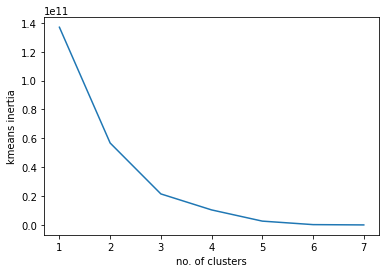

In [26]:
from sklearn.cluster import KMeans

clusters = {}
for i in range(1,8):
    kmeans = KMeans(n_clusters=i).fit(df[['units_sold']])
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()));
plt.xlabel('no. of clusters');
plt.ylabel('kmeans inertia');

In [27]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [28]:
df['units_sold_cluster'] = KMeans(n_clusters=3).fit(df[['units_sold']]).predict(df[['units_sold']])
df = order_cluster('units_sold_cluster','units_sold',df,True)
df.groupby(['units_sold_cluster'])['units_sold'].describe()


,count,mean,std,min,25%,50%,75%,max
units_sold_cluster,,,,,,,,
0,1237.0,1241.873080,1776.405742,1.0,100.0,1000.0,1000.0,5000.0
1,279.0,13691.756272,4834.487556,10000.0,10000.0,10000.0,20000.0,20000.0
2,23.0,63043.478261,22448.887927,50000.0,50000.0,50000.0,75000.0,100000.0


In [29]:
px.scatter(df,x='units_sold',y='rating', color='units_sold_cluster', marginal_y ='box',title='Rating vs units sold')

* Median for rating is 3.85 and the products in top selling cluster has rating between 3.35 to 4.1 seems very reasonable
* Rating is very important to determine the potential of product
* Still there are some products with 5 star rating yet unable to cross the 100-1000 unit sold line
* there are some really bad performing products with rating below 3

In [30]:
px.scatter(df,x='retail_price', y='price',color='units_sold_cluster',marginal_y='box')

Most of the top selling products seems be concentrated to the left where the price difference is much siginificant

In [31]:
px.scatter(df, x='price', y='shipping_option_price', color= 'units_sold_cluster', title='Shipping price vs Price')

People always prefer paying less shipping charges we can see that most selling products has low shipping charges

In [32]:
df.groupby(['uses_ad_boosts'])['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
uses_ad_boosts,,,,,,,,
0,868.0,4590.008065,9592.714940,1.0,100.0,1000.0,5000.0,100000.0
1,671.0,4205.767511,9237.372452,10.0,100.0,1000.0,5000.0,100000.0


Consider these two groups of products one uses ad boost other dosen't

* There is very small difference between the means of the two groups
* Does using ad boost results in more success of products
* How big the difference is bwetween these two two groups?
* Is the effect statistically significant?

In [33]:
rating_cols=['rating_count','rating_five_count','rating_four_count',
             'rating_three_count','rating_two_count','rating_one_count']
ratings_data=df[rating_cols+['uses_ad_boosts']]

ratings_data.groupby('uses_ad_boosts').describe()
fig = go.Figure()
for col in rating_cols:
    fig.add_trace(go.Box(x=ratings_data['uses_ad_boosts'],
                         y=ratings_data[col],
                         name=col,
                         boxmean=True,
                         boxpoints=False))
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(boxmode='group',
                  title='Relations between ad boosts and rating',
                  xaxis = dict(
                  tickvals = [0,1],
                  ticktext = ['Without add boosts','With add boosts']))
fig.show()

By dividing the data into two groups of "with" and "without add boosts", we can see that surprisingly, products without add boosts gain higher number of ratings on average, the same goes for number of 5, 4, 3, 2, 1-star ratings.



In [34]:
def make_clusters(df,column):
    clusters = {}
    for i in range(1,8):
        kmeans = KMeans(n_clusters=i).fit(df[[column]])
        clusters[i] = kmeans.inertia_

    plt.plot(list(clusters.keys()), list(clusters.values()));
    plt.title(f'{column} clusters')
    plt.xlabel('no. of clusters');
    plt.ylabel('kmeans inertia'); 

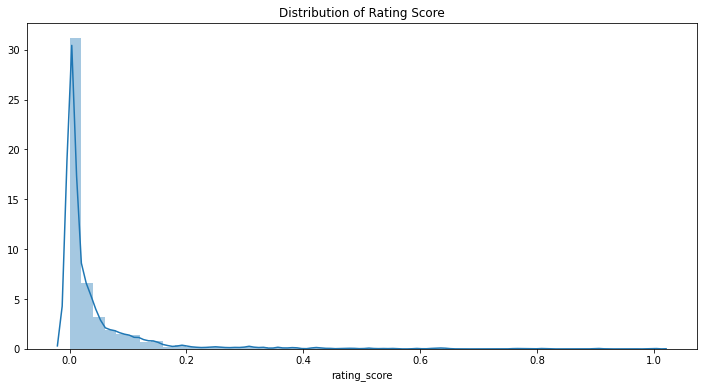

In [35]:
df['rating_score'] = df['rating']*df['rating_count']
df['rating_score'] =df['rating_score']/df['rating_score'].max()
plt.figure(figsize=(12,6))
sns.distplot(df['rating_score']);
plt.title('Distribution of Rating Score');

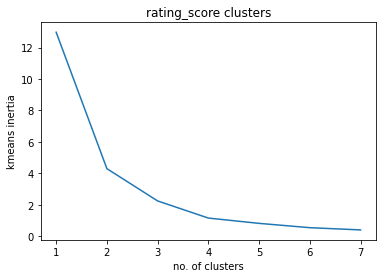

In [36]:
make_clusters(df,'rating_score')

In [37]:
kmeans = KMeans(n_clusters=3).fit(df[['rating_score']])
df['rating_score_cluster'] = kmeans.predict(df[['rating_score']])
df= order_cluster(df=df,cluster_field_name='rating_score_cluster',target_field_name='rating_score',ascending=True)
df.groupby('rating_score_cluster')[['rating','rating_count','units_sold']].describe().T

rating_score_cluster             0             1              2
rating       count     1328.000000    179.000000      32.000000
             mean         3.804691      3.944246       3.896875
             std          0.534414      0.282771       0.212321
             min          1.000000      2.930000       3.350000
             25%          3.500000      3.740000       3.760000
             50%          3.820000      3.970000       3.915000
             75%          4.100000      4.155000       4.020000
             max          5.000000      4.480000       4.410000
rating_count count     1328.000000    179.000000      32.000000
             mean       324.734187   3339.446927   11482.437500
             std        444.461169   1486.234723    3676.615159
             min          0.000000   1669.000000    7575.000000
             25%         20.000000   2324.000000    8904.000000
             50%         99.000000   2789.000000   10136.000000
             75%        518.000000   3832.500000   13270.500000
             max       2191.000000   8164.000000   20744.000000
units_sold   count     1328.000000    179.000000      32.000000
             mean      1913.551958  15558.659218   46250.000000
             std       3071.662575   7787.246156   29594.027296
             min          1.000000   5000.000000   20000.000000
             25%        100.000000  10000.000000   20000.000000
             50%       1000.000000  10000.000000   50000.000000
             75%       1000.000000  20000.000000   50000.000000
             max      20000.000000  50000.000000  100000.000000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: ConvergenceWarning:

Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: ConvergenceWarning:

Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.



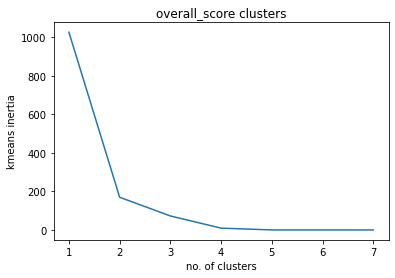

In [38]:
df['overall_score'] = df['rating_score_cluster'] + df['units_sold_cluster']
make_clusters(df,'overall_score');

In [39]:
kmeans= KMeans(n_clusters=2).fit(df[['overall_score']])
df['overall_score_cluster'] = kmeans.predict(df[['overall_score']])
df = order_cluster(df=df,target_field_name='overall_score', cluster_field_name='overall_score_cluster', ascending=True)
df.groupby('overall_score_cluster')[['rating_score','price','units_sold']].describe().T

overall_score_cluster             0              1
rating_score count      1333.000000     206.000000
             mean          0.014880       0.213200
             std           0.020623       0.162260
             min           0.000000       0.085167
             25%           0.000800       0.110891
             50%           0.004250       0.143812
             75%           0.022963       0.260882
             max           0.133229       1.000000
price        count      1333.000000     206.000000
             mean          8.334261       8.500049
             std           4.037216       3.220041
             min           1.000000       2.000000
             25%           5.790000       6.000000
             50%           8.000000       8.000000
             75%          11.000000      11.000000
             max          49.000000      19.000000
units_sold   count      1333.000000     206.000000
             mean       1925.129032   20582.524272
             std        3071.696376   17437.008175
             min           1.000000   10000.000000
             25%         100.000000   10000.000000
             50%        1000.000000   20000.000000
             75%        1000.000000   20000.000000
             max       20000.000000  100000.000000

* With this overall score we have identified the groups of top selling, most liked products which are the ones generating high revenue and products performing below average
* There 213 successfull products with range of units sold from 10K to 100K at a mean price of 8.45
* In the other cluster the mean price is 8.34 but mean units sold are much low
* another thing to notice is that people prefer a reasonable price as in successfull cluster the max price is 19, products in this cluster must be worth the price.

In [40]:
badges_column = ['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

In [41]:
df[df['badges_count'] != 0][badges_column]

,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping
23,1,0,1,0
26,1,0,1,0
30,1,0,1,0
68,1,0,1,0
75,2,1,0,1
...,...,...,...,...
1510,1,0,0,1
1519,1,0,1,0
1522,1,0,1,0
1532,1,0,1,0


In [42]:
def is_successful(units_sold):
    if units_sold > 1000:
        return 1
    else:
        return 0


In [43]:
df['is_successful'] = df['units_sold'].apply(is_successful)
#df['is_successful'] = df['units_sold'].apply(is_successful).astype('category')
print('Percent of successful products: ', df['is_successful'].value_counts()[1] / len(df['is_successful'])*100)

Percent of successful products:  33.6582196231319


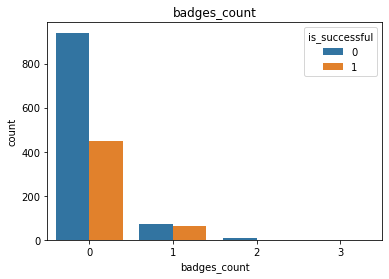

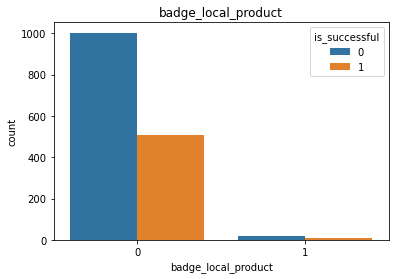

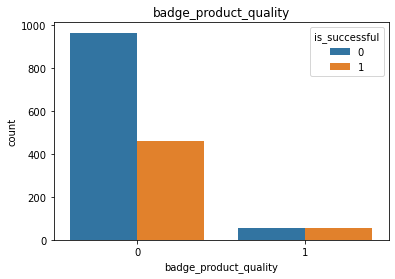

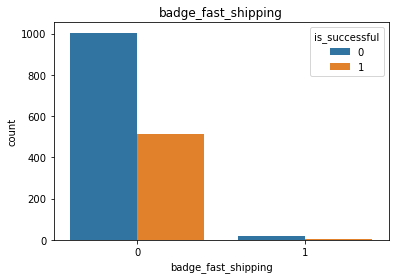

In [44]:
for column in badges_column:
    sns.countplot(data=df, x=column, hue='is_successful')
    plt.title(column)
    plt.show()

# Almost 50% of those who are successful have badges, especially the product quality badge. 
# So, lets assume badges results in sucess, since there are many successful products which do not have badges as well.

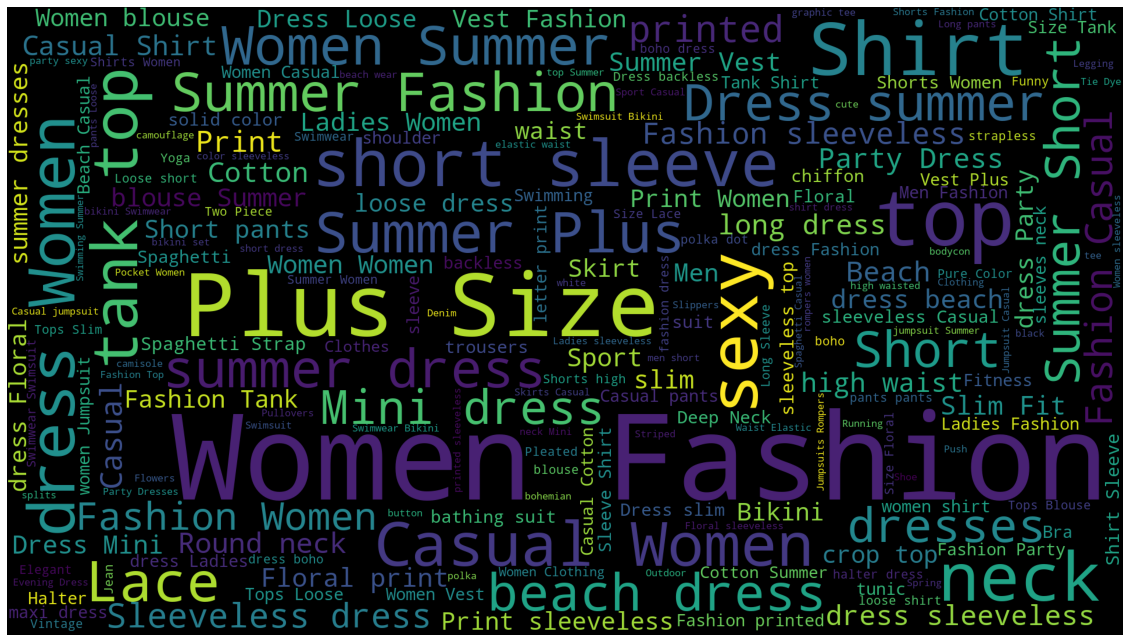

In [45]:
plt.subplots(figsize=(20,35))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.tags))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# THE END